In [106]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib inline

pd.options.display.max_colwidth = 500


In [107]:
s3_prefix = 's3://olgabot-maca/facs/sourmash_search/'
txt = 'aws_s3_ls_sourmash_search.txt'


! aws s3 ls $s3_prefix > $txt
! cat $txt

2018-09-20 00:18:45    6316566 A1-B000610-3_56_F-1-1_tabula-muris-k21-dna_ignore-abundance=False.csv
2018-09-20 01:12:02    6773285 A1-B000610-3_56_F-1-1_tabula-muris-k21-protein_ignore-abundance=False.csv
2018-09-20 01:20:08    9280816 A1-B000610-3_56_F-1-1_tabula-muris-k27-dna_ignore-abundance=False.csv
2018-09-20 05:44:11   10099611 A1-B000610-3_56_F-1-1_tabula-muris-k27-protein_ignore-abundance=False.csv
2018-09-20 00:22:44    6525228 A1-B000610-3_56_F-1-1_tabula-muris-k33-dna_ignore-abundance=False.csv
2018-09-20 22:25:10    6946450 A1-B000610-3_56_F-1-1_tabula-muris-k33-protein_ignore-abundance=False.csv
2018-09-20 00:27:42    6314248 A1-B000610-3_56_F-1-1_tabula-muris-k51-dna_ignore-abundance=False.csv
2018-09-20 01:29:48    6641901 A1-B000610-3_56_F-1-1_tabula-muris-k51-protein_ignore-abundance=False.csv


In [108]:
aws_s3_ls = pd.read_table(txt, delim_whitespace=True, names=['date', 'time', 'size', 'basename'])
aws_s3_ls

,date,time,size,basename
0,2018-09-20,00:18:45,6316566,A1-B000610-3_56_F-1-1_tabula-muris-k21-dna_ignore-abundance=False.csv
1,2018-09-20,01:12:02,6773285,A1-B000610-3_56_F-1-1_tabula-muris-k21-protein_ignore-abundance=False.csv
2,2018-09-20,01:20:08,9280816,A1-B000610-3_56_F-1-1_tabula-muris-k27-dna_ignore-abundance=False.csv
3,2018-09-20,05:44:11,10099611,A1-B000610-3_56_F-1-1_tabula-muris-k27-protein_ignore-abundance=False.csv
4,2018-09-20,00:22:44,6525228,A1-B000610-3_56_F-1-1_tabula-muris-k33-dna_ignore-abundance=False.csv
5,2018-09-20,22:25:10,6946450,A1-B000610-3_56_F-1-1_tabula-muris-k33-protein_ignore-abundance=False.csv
6,2018-09-20,00:27:42,6314248,A1-B000610-3_56_F-1-1_tabula-muris-k51-dna_ignore-abundance=False.csv
7,2018-09-20,01:29:48,6641901,A1-B000610-3_56_F-1-1_tabula-muris-k51-protein_ignore-abundance=False.csv


In [6]:
import re

In [84]:
s = 'A1-B000610-3_56_F-1-1_tabula-muris-k51-protein_ignore-abundance=False'
pattern = 'k(?P<ksize>\d+)-(?P<seq>\w+)_ignore-abundance=(?P<ignore_abundance>True|False)'
re.findall(pattern, s)

[('51', 'protein', 'False')]

In [85]:
parameters = aws_s3_ls.basename.str.extract(pattern, expand=True)
parameters['ksize'] = parameters['ksize'].astype(int)
parameters['ignore_abundance'] = parameters['ignore_abundance'].astype(bool)
parameters

,ksize,seq,ignore_abundance
0,21,dna,True
1,21,protein,True
2,27,dna,True
3,27,protein,True
4,33,dna,True
5,33,protein,True
6,51,dna,True
7,51,protein,True


In [86]:
aws_s3_ls_parameters = pd.concat([aws_s3_ls, parameters], axis=1)
aws_s3_ls_parameters

,date,time,size,basename,ksize,seq,ignore_abundance
0,2018-09-19,19:50:31,6316566,A1-B000610-3_56_F-1-1_tabula-muris-k21-dna_ignore-abundance=False.csv,21,dna,True
1,2018-09-19,20:44:49,6773285,A1-B000610-3_56_F-1-1_tabula-muris-k21-protein_ignore-abundance=False.csv,21,protein,True
2,2018-09-19,20:37:14,9280816,A1-B000610-3_56_F-1-1_tabula-muris-k27-dna_ignore-abundance=False.csv,27,dna,True
3,2018-09-19,22:15:16,9591190,A1-B000610-3_56_F-1-1_tabula-muris-k27-protein_ignore-abundance=False.csv,27,protein,True
4,2018-09-19,19:59:50,6525228,A1-B000610-3_56_F-1-1_tabula-muris-k33-dna_ignore-abundance=False.csv,33,dna,True
5,2018-09-19,21:07:41,6589827,A1-B000610-3_56_F-1-1_tabula-muris-k33-protein_ignore-abundance=False.csv,33,protein,True
6,2018-09-19,19:48:59,6314248,A1-B000610-3_56_F-1-1_tabula-muris-k51-dna_ignore-abundance=False.csv,51,dna,True
7,2018-09-19,21:15:14,6641901,A1-B000610-3_56_F-1-1_tabula-muris-k51-protein_ignore-abundance=False.csv,51,protein,True


In [88]:
import glob
import os
import re

dfs = []



for i, row in aws_s3_ls_parameters.iterrows():
    filename = s3_prefix + row['basename']
    try:
        df = pd.read_csv(filename)
    except pd.io.parsers.EmptyDataError:
        continue
        
    
    df['ksize'] = row['ksize']
    df['seq'] = row['seq']
    df['ignore_abundance'] = row['ignore_abundance']
    dfs.append(df)
    
search_results = pd.concat(dfs, ignore_index=True)
search_results.head()

,similarity,name,filename,md5,ksize,seq,ignore_abundance
0,1.000000,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:A1-B000610-3_56_F-1-1,tabula-muris-k21-dna,3413cb3e2d21ab83572f49de51dac2e6,21,dna,True
1,0.893563,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:A13-B000610-3_56_F-1-1,tabula-muris-k21-dna,15ca87e27d546f9b7972ff150a41480f,21,dna,True
2,0.879294,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:E2-B000610-3_56_F-1-1,tabula-muris-k21-dna,edacf015289b20877385cd68188bd7bd,21,dna,True
3,0.876851,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:K14-B000610-3_56_F-1-1,tabula-muris-k21-dna,772e252a524576ca4687ac7d6d4cd93c,21,dna,True
4,0.872425,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:C15-B000610-3_56_F-1-1,tabula-muris-k21-dna,ceb6145f9e786c0ebce8a4b44b767d27,21,dna,True


In [89]:
def combine_cell_ontology_free_annotation(row):
    if pd.notnull(row['free_annotation']):
        return '{cell_ontology_class} ({free_annotation})'.format(**row)
    else:
        return row['cell_ontology_class']


def extract_cell_annotations(name_column):
    pattern = '(\w+):([\w\d\-_]+)'
    expanded = name_column.str.extractall(pattern)
    expanded_index = expanded.reset_index()
    annotations = expanded_index.pivot(columns=0, values=1, index='level_0')
    annotations['cell_ontology_free_annotation'] = annotations.apply(combine_cell_ontology_free_annotation, axis=1)
    return annotations 

In [90]:
cell_annotation_pattern = '(\w+):([\w\d\-_]+)'

annotations = extract_cell_annotations(search_results.name)
annotations.head()

,cell_id,cell_ontology_class,free_annotation,subtissue,tissue,cell_ontology_free_annotation
level_0,,,,,,
0,A1-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder,bladder_cell (Bladder_mesenchymal_cell)
1,A13-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder,bladder_cell (Bladder_mesenchymal_cell)
2,E2-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder,bladder_cell (Bladder_mesenchymal_cell)
3,K14-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder,bladder_cell (Bladder_mesenchymal_cell)
4,C15-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder,bladder_cell (Bladder_mesenchymal_cell)


In [91]:
search_results_annotated = search_results.join(annotations)
print(search_results_annotated.shape)
search_results_annotated.head()

(298790, 13)


,similarity,name,filename,md5,ksize,seq,ignore_abundance,cell_id,cell_ontology_class,free_annotation,subtissue,tissue,cell_ontology_free_annotation
0,1.000000,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:A1-B000610-3_56_F-1-1,tabula-muris-k21-dna,3413cb3e2d21ab83572f49de51dac2e6,21,dna,True,A1-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder,bladder_cell (Bladder_mesenchymal_cell)
1,0.893563,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:A13-B000610-3_56_F-1-1,tabula-muris-k21-dna,15ca87e27d546f9b7972ff150a41480f,21,dna,True,A13-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder,bladder_cell (Bladder_mesenchymal_cell)
2,0.879294,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:E2-B000610-3_56_F-1-1,tabula-muris-k21-dna,edacf015289b20877385cd68188bd7bd,21,dna,True,E2-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder,bladder_cell (Bladder_mesenchymal_cell)
3,0.876851,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:K14-B000610-3_56_F-1-1,tabula-muris-k21-dna,772e252a524576ca4687ac7d6d4cd93c,21,dna,True,K14-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder,bladder_cell (Bladder_mesenchymal_cell)
4,0.872425,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:C15-B000610-3_56_F-1-1,tabula-muris-k21-dna,ceb6145f9e786c0ebce8a4b44b767d27,21,dna,True,C15-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder,bladder_cell (Bladder_mesenchymal_cell)


/home/ubuntu/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


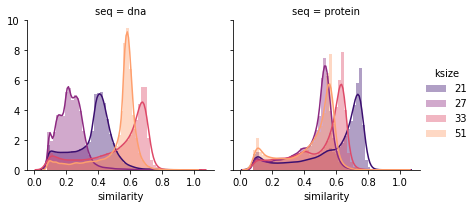

In [92]:
g = sns.FacetGrid(search_results_annotated, hue='ksize', palette='magma', 
                  col='seq')
g.map(sns.distplot, 'similarity')
g.add_legend()

/home/ubuntu/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


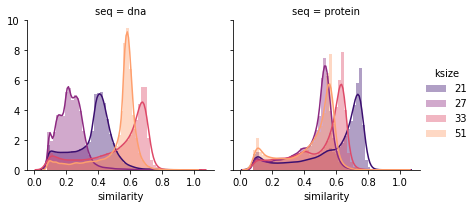

In [93]:
g = sns.FacetGrid(search_results_annotated, hue='ksize', palette='magma', 
                  col='seq')
g.map(sns.distplot, 'similarity')
g.add_legend()

In [94]:
tissue_colors = pd.read_csv('/home/ubuntu/tabula-muris/00_data_ingest/15_color_palette/tissue_colors.csv', 
                            squeeze=True, index_col=0)
tissue_colors.head()

Aorta                #1f77b4
Bladder              #aec7e8
Brain_Myeloid        #ff7f0e
Brain_Non-Myeloid    #ffbb78
Diaphragm            #2ca02c
Name: color, dtype: object

/home/ubuntu/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


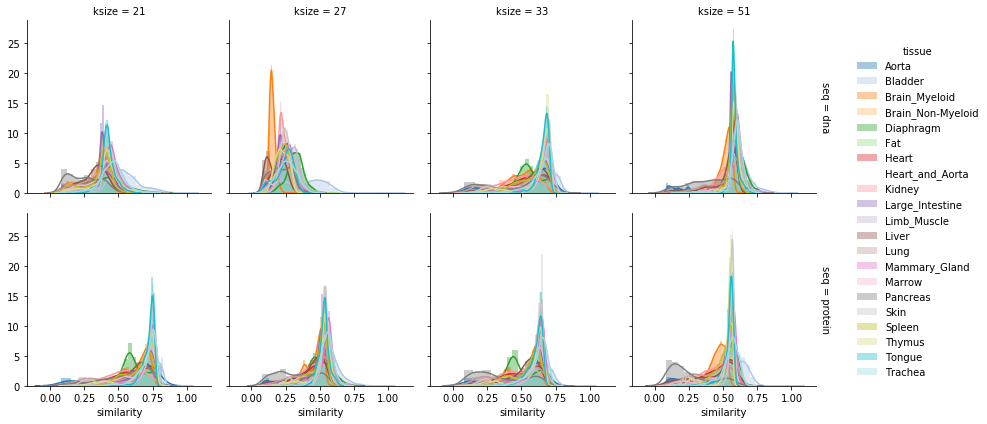

In [95]:
g = sns.FacetGrid(search_results_annotated, col='ksize', hue='tissue', row='seq',
                  palette=tissue_colors, margin_titles=True, hue_order=tissue_colors.index)
g.map(sns.distplot, 'similarity')
g.add_legend()

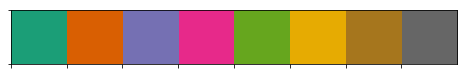

In [96]:
import matplotlib as mpl

dark2 = sns.color_palette('Dark2')
dark2 = [mpl.colors.rgb2hex(x) for x in dark2]
sns.palplot(dark2)

bladder = 'Bladder'


highlight_bladder_colors = tissue_colors.copy()
highlight_bladder_colors[highlight_bladder_colors.index != bladder] = 'lightgrey'
highlight_bladder_colors[bladder] = dark2[3]

hue_order = highlight_bladder_colors.index.difference([bladder]).tolist()
hue_order.append(bladder)
hue_order

palette = highlight_bladder_colors[hue_order]
palette

tissue_kws = dict(hue='tissue', palette=palette, 
                  hue_order=hue_order)

In [ ]:
g = sns.FacetGrid(search_results_annotated, col='ksize', row='seq', 
                  margin_titles=True, size=2,
                  **tissue_kws)
g.map(sns.kdeplot, 'similarity', shade=True)
# g.set(xlim=(0, 0.2), ylim=(0, 100))
# g.add_legend()

## do same for cell ontology class, only highlighting "bladder cell"

In [98]:
bladder_cell = 'bladder_cell'

cell_ontology_hue_order = set(search_results_annotated.cell_ontology_class.unique()).difference([bladder])
cell_ontology_hue_order = list(cell_ontology_hue_order)
cell_ontology_hue_order.append(bladder_cell)
cell_ontology_hue_order

cell_ontology_palette = pd.Series('lightgrey', index=cell_ontology_hue_order)
cell_ontology_palette[bladder_cell] = dark2[0]
cell_ontology_palette

cell_ontology_kws = dict(hue='cell_ontology_class', palette=cell_ontology_palette, 
                  hue_order=cell_ontology_hue_order)

/home/ubuntu/anaconda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/ubuntu/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


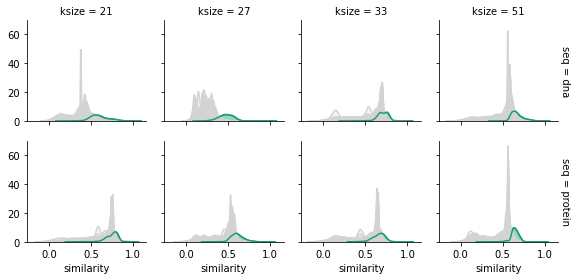

In [99]:
g = sns.FacetGrid(search_results_annotated, col='ksize', row='seq', 
                  margin_titles=True, size=2,
                  **cell_ontology_kws)
g.map(sns.kdeplot, 'similarity', shade=True)
# g.set(xlim=(0, 0.2), ylim=(0, 100))
# g.add_legend()

In [100]:
search_results_annotated_bladder = search_results_annotated.query('tissue == "Bladder"')
print(search_results_annotated_bladder.shape)
search_results_annotated_bladder.head()

(7849, 13)


,similarity,name,filename,md5,ksize,seq,ignore_abundance,cell_id,cell_ontology_class,free_annotation,subtissue,tissue,cell_ontology_free_annotation
0,1.000000,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:A1-B000610-3_56_F-1-1,tabula-muris-k21-dna,3413cb3e2d21ab83572f49de51dac2e6,21,dna,True,A1-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder,bladder_cell (Bladder_mesenchymal_cell)
1,0.893563,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:A13-B000610-3_56_F-1-1,tabula-muris-k21-dna,15ca87e27d546f9b7972ff150a41480f,21,dna,True,A13-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder,bladder_cell (Bladder_mesenchymal_cell)
2,0.879294,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:E2-B000610-3_56_F-1-1,tabula-muris-k21-dna,edacf015289b20877385cd68188bd7bd,21,dna,True,E2-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder,bladder_cell (Bladder_mesenchymal_cell)
3,0.876851,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:K14-B000610-3_56_F-1-1,tabula-muris-k21-dna,772e252a524576ca4687ac7d6d4cd93c,21,dna,True,K14-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder,bladder_cell (Bladder_mesenchymal_cell)
4,0.872425,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:C15-B000610-3_56_F-1-1,tabula-muris-k21-dna,ceb6145f9e786c0ebce8a4b44b767d27,21,dna,True,C15-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder,bladder_cell (Bladder_mesenchymal_cell)


/home/ubuntu/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


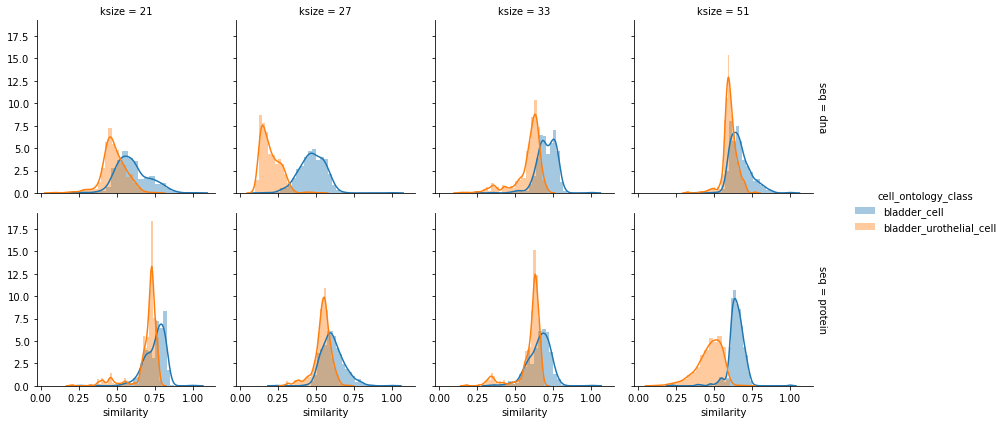

In [101]:
g = sns.FacetGrid(search_results_annotated_bladder, col='ksize', hue='cell_ontology_class',
                 row='seq', margin_titles=True, size=2)
g.map(sns.distplot, 'similarity')
g.add_legend()

/home/ubuntu/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


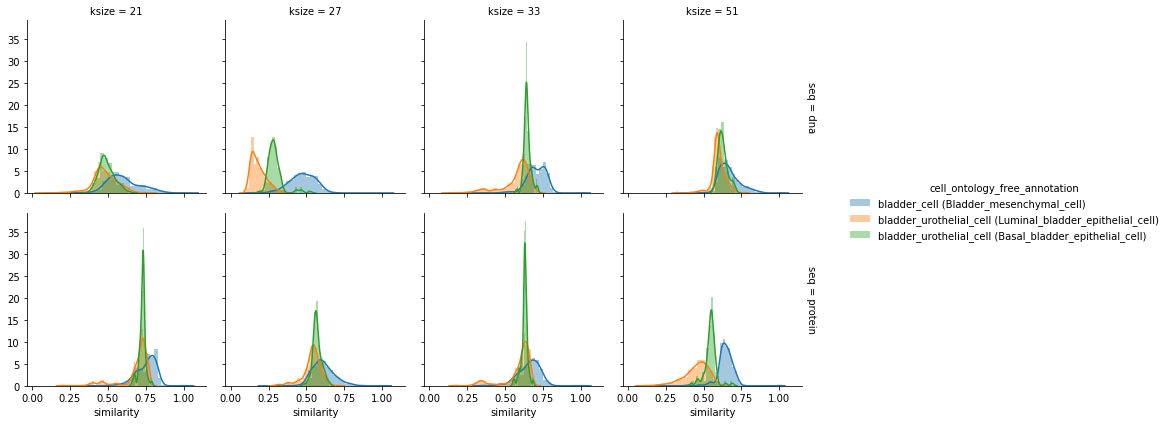

In [102]:
g = sns.FacetGrid(search_results_annotated_bladder, col='ksize', hue='cell_ontology_free_annotation',
                 row='seq', margin_titles=True, size=2)
g.map(sns.distplot, 'similarity')
g.add_legend()

In [103]:
# g = sns.FacetGrid(search_results_annotated_bladder,  hue='name')
# g.map(plt.plot, 'ksize', 'similarity')
# # g.add_legend()

/home/ubuntu/anaconda/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/ubuntu/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


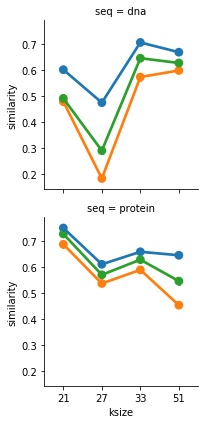

In [104]:
g = sns.FacetGrid(search_results_annotated_bladder,  hue='cell_ontology_free_annotation',
                 row='seq',)
g.map(sns.pointplot, 'ksize', 'similarity')
# g.add_legend()